## Chapter 5
Snippets for the chapter 5

Load data

In [1]:
import pandas as pd

df = pd.read_csv('data/longevity.csv')
df.shape

(1000, 2)

## The Baseline Model

Create density plot of 1,000 people’s life spans, facetted by smokers

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


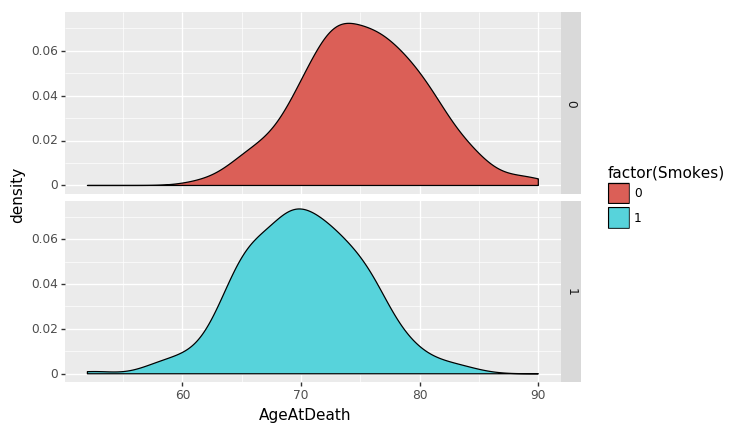

<ggplot: (-9223371874246549409)>

In [2]:
%matplotlib inline
from plotnine import *

fig = (
    ggplot(data = df, mapping=aes(x = 'AgeAtDeath',  fill = 'factor(Smokes)')) +
    geom_density() +
    facet_grid(('Smokes', '.'))
)

fig

Calculate MSE using the mean of AgeAtDeath (73)

In [3]:
import numpy as np

guess = 73
np.square(df['AgeAtDeath'] - guess).mean()

32.991

Calculate MSE for another values

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


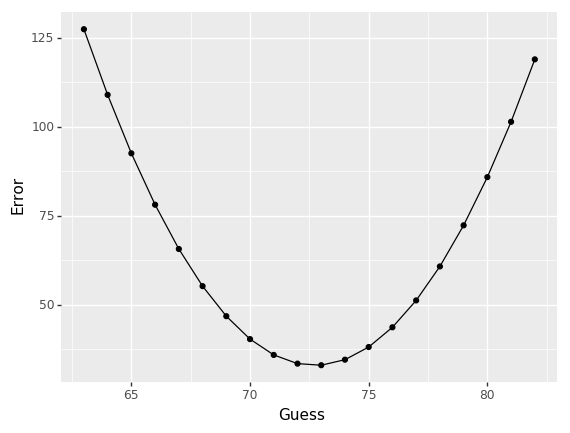

<ggplot: (162611423692)>

In [4]:
df_accurancy = pd.DataFrame({}, columns = ['Guess', 'Error'])

for age in range(63, 83):
    error = np.square(df['AgeAtDeath'] - age).mean()
    df_accurancy = df_accurancy.append({'Guess': age, 'Error': error}, ignore_index=True)
    
fig = (
    ggplot(data = df_accurancy, mapping=aes(x = 'Guess',  y = 'Error')) +
    geom_point() +
    geom_line()
)

fig

## Regression Using Dummy Variables

Calculate RMSE with and without smoking information

In [5]:
mean = df['AgeAtDeath'].mean()
smokes_mean = df[df['Smokes'] == 1]['AgeAtDeath'].mean()
no_smokes_mean = df[df['Smokes'] == 0]['AgeAtDeath'].mean()

def getMean(is_smoke):
    if is_smoke:
        return smokes_mean
    return no_smokes_mean
        

rmse_without_smoking  = np.sqrt(np.square(df['AgeAtDeath'] - guess).mean())
df['mean'] = df.apply(lambda row: getMean(row.Smokes), axis = 1) 
rmse_with_smoking  = np.sqrt(np.square(df['AgeAtDeath'] - df['mean']).mean())

print ('Error without smoking information', rmse_without_smoking)
print ('Error with smoking information', rmse_with_smoking)

Error without smoking information 5.743779243668754
Error with smoking information 5.148622145778417


## Linear Regression in a Nutshell

In [6]:
df = pd.read_csv('data/01_heights_weights_genders.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Weights versus heights

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


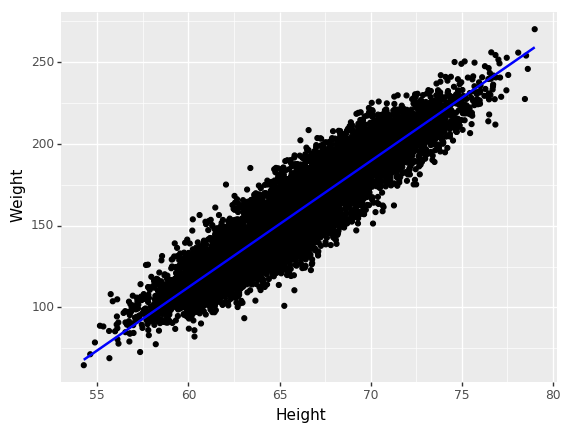

<ggplot: (162611519713)>

In [7]:
fig = (
    ggplot(data=df, mapping=aes(x = 'Height', y = 'Weight')) +
    geom_point() +
    geom_smooth(colour='blue')
)

fig

Print linear regression model details

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['Height']], df['Weight'])

print (model.intercept_, model.coef_)


-350.73719181213744 [7.71728764]


Calculate RMSE for linear regression model

In [9]:
predicted_values = model.predict(df[['Height']])
np.sqrt(np.square(predicted_values - df['Weight']).mean())


12.218571272826043

## Predicting Web Traffic

In [10]:
df = pd.read_csv('data/top_1000_sites.tsv', sep='\t')
df.head()

,Rank,Site,Category,UniqueVisitors,Reach,PageViews,HasAdvertising,InEnglish,TLD
0,1,facebook.com,Social Networks,880000000,47.2,910000000000,Yes,Yes,com
1,2,youtube.com,Online Video,800000000,42.7,100000000000,Yes,Yes,com
2,3,yahoo.com,Web Portals,660000000,35.3,77000000000,Yes,Yes,com
3,4,live.com,Search Engines,550000000,29.3,36000000000,Yes,Yes,com
4,5,wikipedia.org,Dictionaries & Encyclopedias,490000000,26.2,7000000000,No,Yes,org


Scatterplot of UniqueVisitors versus PageViews

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


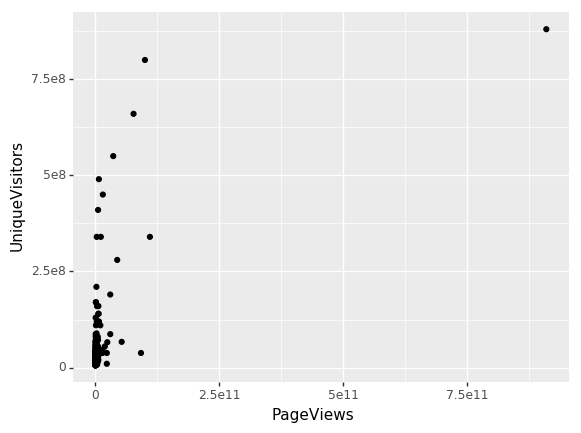

<ggplot: (-9223371874241583563)>

In [11]:
fig = (
    ggplot(data=df, mapping=aes(x = 'PageViews', y = 'UniqueVisitors')) +
    geom_point()
)

fig

Density plot for PageViews

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


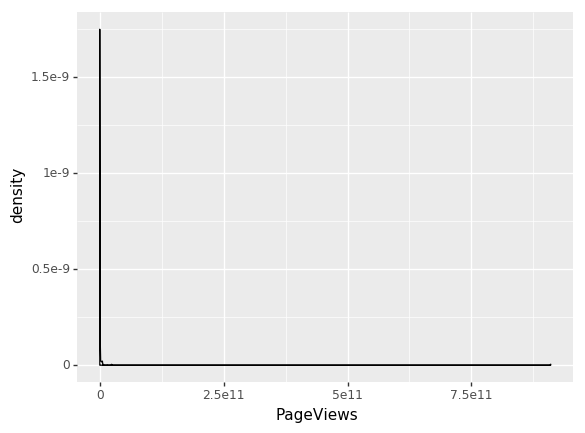

<ggplot: (162613192284)>

In [12]:
fig = (
    ggplot(data=df, mapping=aes(x = 'PageViews')) +
    geom_density()
)

fig

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


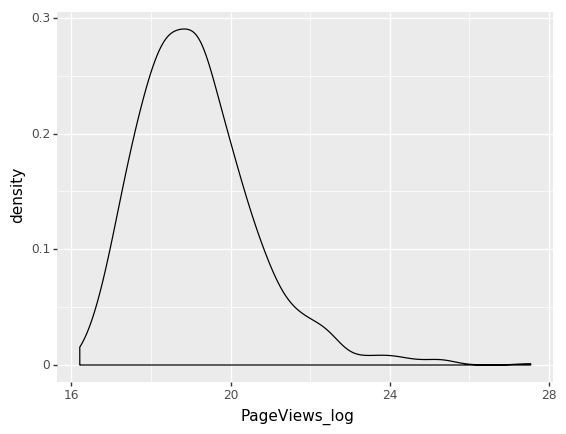

<ggplot: (162613229576)>

In [13]:
df['PageViews_log'] = df.apply(lambda row: np.log(row.PageViews), axis = 1) 

fig = (
    ggplot(data=df, mapping=aes(x = 'PageViews_log')) +
    geom_density()
)

fig

Scatterplot of UniqueVisitors versus PageViews using log transforms

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


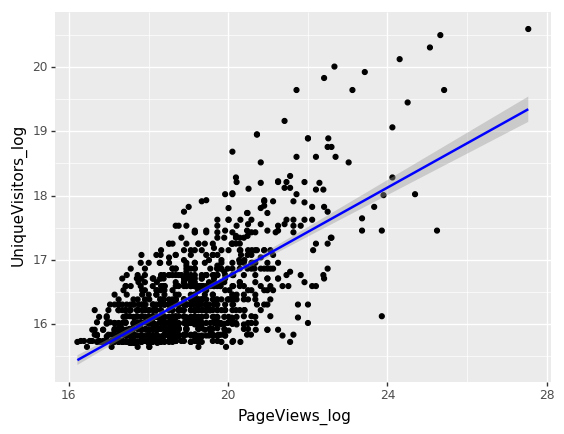

<ggplot: (162613234461)>

In [14]:
df['PageViews_log'] = df.apply(lambda row: np.log(row.PageViews), axis = 1) 
df['UniqueVisitors_log'] = df.apply(lambda row: np.log(row.UniqueVisitors), axis = 1) 


fig = (
    ggplot(data=df, mapping=aes(x = 'PageViews_log', y = 'UniqueVisitors_log')) +
    geom_point() +
    geom_smooth(colour='blue')
)

fig

Create linear regression model

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['PageViews_log']], df['UniqueVisitors_log'])
predicted_values = model.predict(df[['PageViews_log']])

print (model.intercept_, model.coef_)

9.832875412493808 [0.34543597]


Show model error and R2 score

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(df['UniqueVisitors_log'], predicted_values)  
rmse = np.sqrt(np.square(df['UniqueVisitors_log'] - predicted_values).mean())

print ('R2 score', r2)
print ('RMSE', rmse)

R2 score 0.46159849489470917
RMSE 0.5504175008060579
